In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(stringr))
library(hise)
library(purrr)
library (plyr)
if(!"visdat" %in% rownames(installed.packages())) {
    install.packages("visdat")
}
library(visdat)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following object is masked from ‘package:purrr’:

    compact


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




In [2]:
lab_res_all <- data.frame() 

for (file_type in c("scRNA-seq-labeled", "Olink", "FlowCytometry")) {
  lab_res <- data.frame() 
  for (cohorts in c('BR1','BR2')) {
    desc <- try(getFileDescriptors(
      fileType = file_type,
      filter = list(cohort.cohortGuid = cohorts)
    ), silent = TRUE)
    
    if (class(desc) == "try-error") {
      message(paste0("No Samples for this file type-Skipping ", file_type, " - ", cohorts))
      next
    }
    df2 <- fileDescToLabs(desc[[1]])
    desc_df <- fileDescToDataframe(desc)
    desc_df <- desc_df[c('sample.sampleKitGuid',
                         'sample.visitName', 
                         'sample.visitDetails',
                         'cohort.cohortGuid', 
                         'subject.race', 
                         'subject.subjectGuid',
                           'subject.biologicalSex', 
                         'subject.birthYear', 
                         'subject.ethnicity')]
    desc_df <- desc_df[!duplicated(desc_df[, c('sample.sampleKitGuid')]), ]
    df2 <- left_join(desc_df, df2, by = c("sample.sampleKitGuid"))
    lab_res <- rbind.fill(lab_res, df2)   
  }
  lab_res_all <- rbind.fill(lab_res_all, lab_res)   
}


No Samples for this file type-Skipping FlowCytometry - BR1

No Samples for this file type-Skipping FlowCytometry - BR2



In [3]:
lab_res_all<-unique(lab_res_all)

In [4]:
lab_res_all<-lab_res_all %>% arrange(sample.sampleKitGuid)

In [5]:
rownames(lab_res_all)<-NULL

In [6]:
dim(lab_res_all)

[1] 999 111

In [11]:
write.csv(
    lab_res_all,
    "lab_results_BRI.csv"
)

### Examining missing values

Not all samples have clinical lab results attached to them, and some cohorts have specialized clinical labs performed that are related to the disease of interest. In addition, we may simply not have completed data ingest and storage for some cohorts or donors.

Thus, there are missing values in our clinical lab data in HISE, which we can investigate with the `visdat` package. 

This gives us a visual overview of what's available or missing in our lab_results table:

In [8]:
dim(lab_res_all)

[1] 999 111

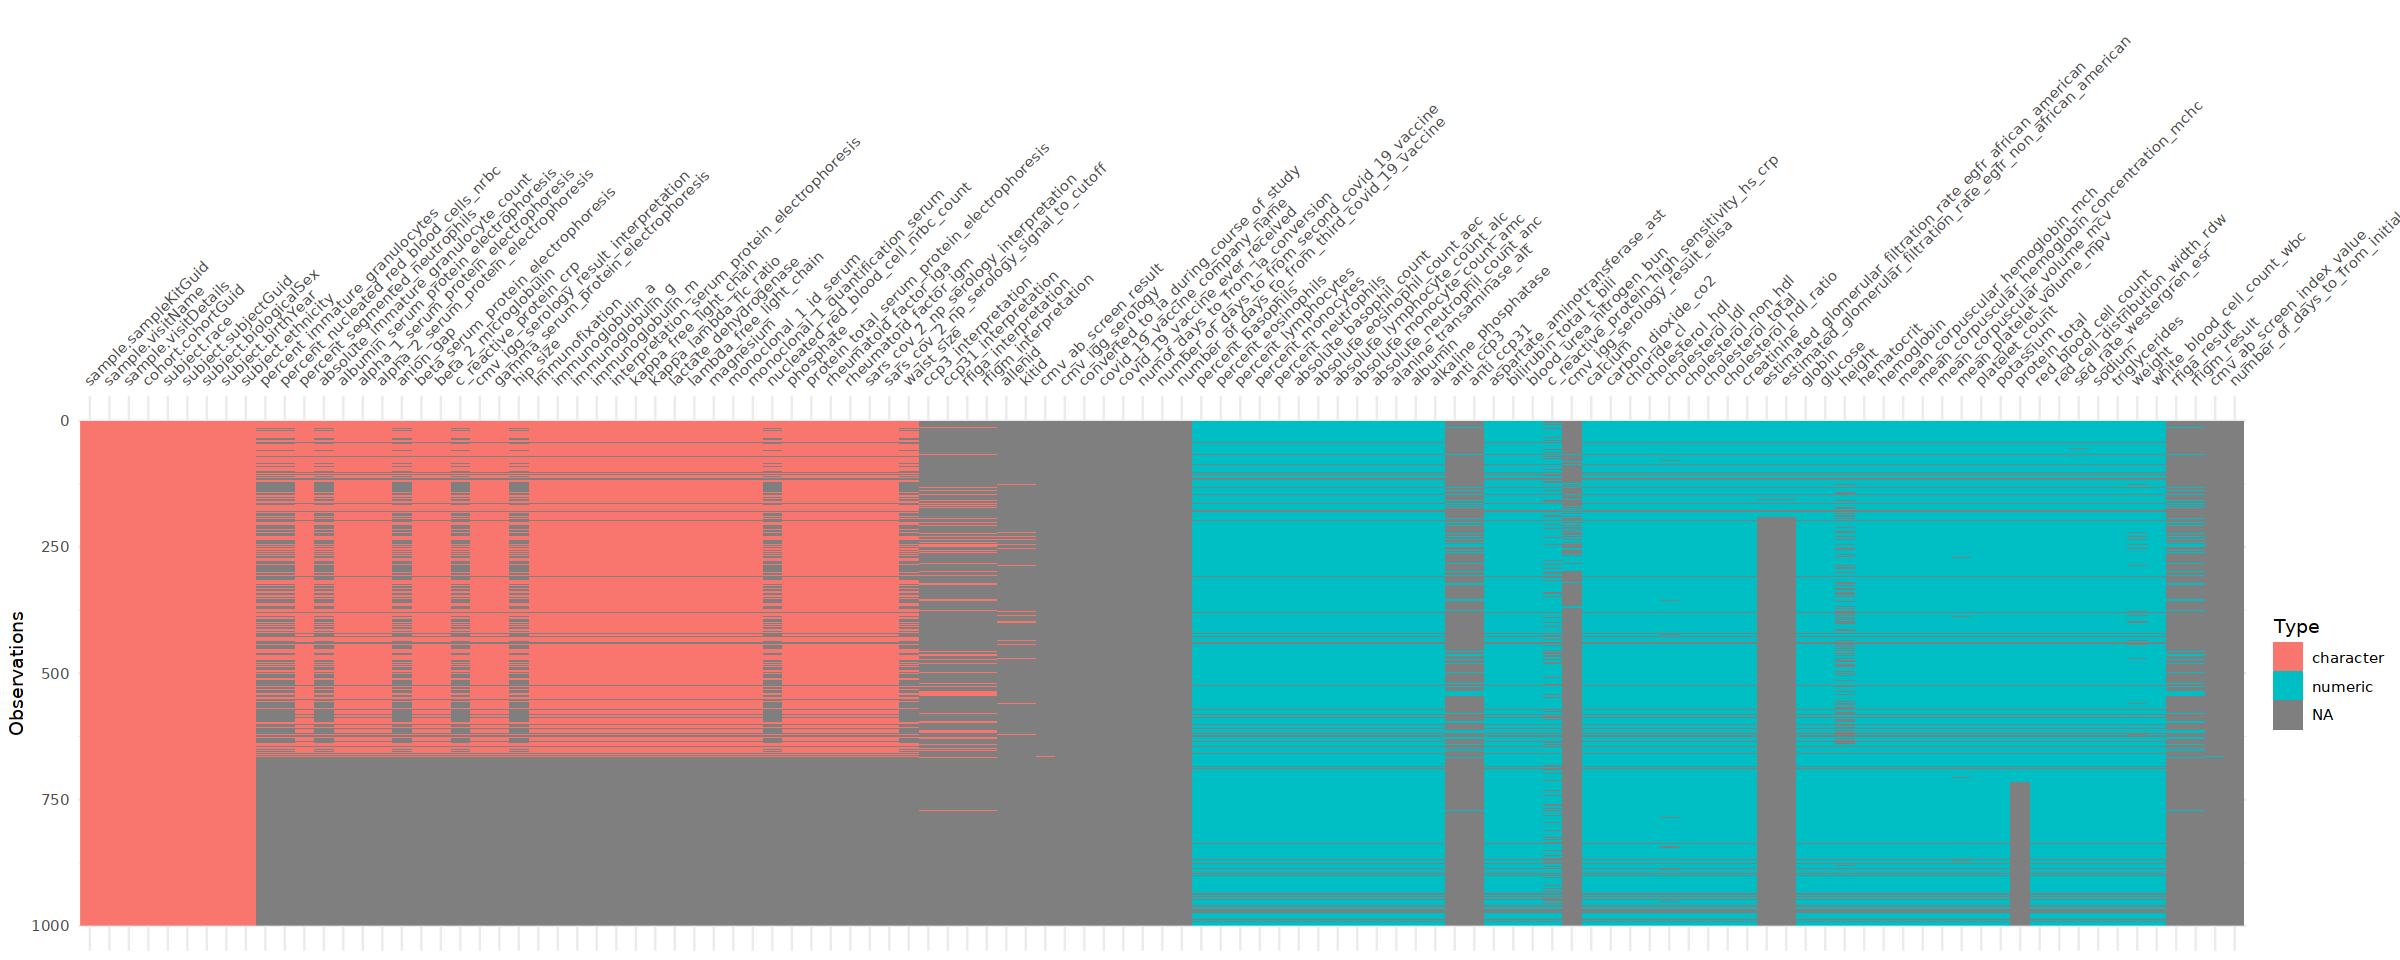

In [9]:
options(repr.plot.width = 20, repr.plot.height = 8)

vis_dat(lab_res_all)

### Session info

In [10]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] visdat_0.6.0  plyr_1.8.9    purrr_1.0.2   hise_2.16.0   stringr_1.5.1
[6] tibble_3.2.1  tidyr_1.3.1   dplyr_1.1.4  

loaded via a namespace (and not attached):
 [1] gtable_0.3.4     jsonlite_1.8.8   compiler_4.3.1   crayon_1.5.2    
 [5] tidyselect_1.2.1 Rcpp_1.0.12      IRdisplay_1.1    bitops_1.0-7    
 [9